<a href="https://colab.research.google.com/github/nestorm94/IA_2023_1/blob/main/parcial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b> Ciencias de la computación e Inteligencia Artificial </b>
<br>
<i><b>Autores:</b></i>
<br>
 - Nestor Morales
 <br>
 - Luis Torres
 <br>
 -Santiago Sandoval
 <br>
<i><b>Docente:</b></i>  Darwin Martinez
<br>
<i><b>Asignatura:</b></i> Ineteligencia Artificial
<br>
</FONT>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


# A Preparación de los datos: 

In [2]:
df = pd.read_csv("/content/Credit2.csv", sep=';')
df.sort_index()
df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Investment,Balance
0,$85.425,$5182.0,402.0,6.0,60.0,12 years,No,No,Yes,East,11.669.332.992.087.300,$218.0
1,$49.927,$6396.0,485.0,3.0,75.0,17 years,Yes,No,Yes,South,22.334.650.815.225.700,$890.0
2,$10.403,$4159.0,310.0,3.0,43.0,7 years,No,No,Yes,West,18.133.794.004.903.000,$571.0
3,$30.413,$3690.0,299.0,2.0,25.0,15 years,Yes,Yes,No,West,20.317.314.965.668.300,$728.0
4,$24.088,$3665.0,287.0,4.0,56.0,13 years,Yes,No,Yes,South,1.366.219.158.730.640,$309.0


In [3]:
# Eliminar la columna 'Region', 'Investment'
df = df.drop('Region', axis=1)
df = df.drop('Investment', axis=1)
df

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Balance
0,$85.425,$5182.0,402.0,6.0,60.0,12 years,No,No,Yes,$218.0
1,$49.927,$6396.0,485.0,3.0,75.0,17 years,Yes,No,Yes,$890.0
2,$10.403,$4159.0,310.0,3.0,43.0,7 years,No,No,Yes,$571.0
3,$30.413,$3690.0,299.0,2.0,25.0,15 years,Yes,Yes,No,$728.0
4,$24.088,$3665.0,287.0,4.0,56.0,13 years,Yes,No,Yes,$309.0
...,...,...,...,...,...,...,...,...,...,...
407,$57.1,$4742.0,372.0,7.0,79.0,18 years,Yes,No,Yes,$379.0
408,$93.039,$7398.0,517.0,1.0,67.0,12 years,No,No,Yes,$749.0
409,$83.869,$7667.0,554.0,2.0,83.0,11 years,No,No,No,$930.0
410,$76.273,$4779.0,367.0,4.0,65.0,14 years,Yes,No,Yes,$133.0


In [4]:
df['Income'] = df['Income'].str.replace(',', '').str.replace('$', '').str.replace('.', '').fillna(0).astype(float)
df['Balance'] = df['Balance'].str.replace(',', '').str.replace('$', '').str.replace('.', '').fillna(0).astype(float)
df['Limit'] = df['Limit'].str.replace(',', '').str.replace('$', '').str.replace('.', '').fillna(0).astype(float)
df['Education'] = df['Education'].str.replace('years','').fillna(0).astype(float)


<ipython-input-4-4518d339b339>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Income'] = df['Income'].str.replace(',', '').str.replace('$', '').str.replace('.', '').fillna(0).astype(float)
<ipython-input-4-4518d339b339>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Balance'] = df['Balance'].str.replace(',', '').str.replace('$', '').str.replace('.', '').fillna(0).astype(float)
<ipython-input-4-4518d339b339>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Limit'] = df['Limit'].str.replace(',', '').str.rep

In [5]:
df['Own'] = df['Own'].str.replace('Yes','1').str.replace('No','0').fillna(0).astype(float)
df['Student'] = df['Student'].str.replace('Yes','1').str.replace('No','0').fillna(0).astype(float)
df['Married'] = df['Married'].str.replace('Yes','1').str.replace('No','0').fillna(0).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     412 non-null    float64
 1   Limit      412 non-null    float64
 2   Rating     410 non-null    float64
 3   Cards      410 non-null    float64
 4   Age        410 non-null    float64
 5   Education  412 non-null    float64
 6   Own        412 non-null    float64
 7   Student    412 non-null    float64
 8   Married    412 non-null    float64
 9   Balance    412 non-null    float64
dtypes: float64(10)
memory usage: 32.3 KB


In [6]:
train, test = train_test_split(df, test_size=0.20, random_state=45)
dt_prueba = test.copy()
cantidad = len(dt_prueba)
print('la catidad de datos del dataframe de pruebas',cantidad,'\n ')
print('Se evidencia la sumatoria de los siguientes de datos de null o NAN: \n',dt_prueba.isnull().sum())

la catidad de datos del dataframe de pruebas 83 
 
Se evidencia la sumatoria de los siguientes de datos de null o NAN: 
 Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Own          0
Student      0
Married      0
Balance      0
dtype: int64


In [7]:
#Se verifican los datos no disponibles en el dataFrame
df.isnull().sum().sum()
df.dropna(inplace=True)
cantidad = len(df)
print('la catidad de datos del dataframe de pruebas',cantidad,'\n ')
print('Se evidencia la sumatoria de los siguientes de datos de null o NAN: \n',dt_prueba.isnull().sum())

la catidad de datos del dataframe de pruebas 408 
 
Se evidencia la sumatoria de los siguientes de datos de null o NAN: 
 Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Own          0
Student      0
Married      0
Balance      0
dtype: int64


In [8]:
dt_prueba

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Balance
52,44061.0,49700.0,352.0,1.0,79.0,11.0,0.0,0.0,1.0,4140.0
237,43682.0,69220.0,511.0,1.0,49.0,9.0,0.0,0.0,1.0,10810.0
226,31367.0,18290.0,162.0,4.0,30.0,10.0,0.0,0.0,1.0,0.0
25,10627.0,16470.0,149.0,2.0,71.0,10.0,1.0,1.0,1.0,1950.0
333,92112.0,46120.0,344.0,3.0,32.0,17.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
72,21786.0,46320.0,355.0,1.0,50.0,17.0,0.0,0.0,1.0,5800.0
45,92386.0,76850.0,534.0,2.0,75.0,18.0,1.0,0.0,1.0,8430.0
104,29567.0,53090.0,397.0,3.0,25.0,15.0,0.0,0.0,0.0,7990.0
357,58063.0,42210.0,304.0,3.0,50.0,8.0,0.0,0.0,0.0,1180.0


In [9]:
# Verificar si existen valores faltantes
missing_values = pd.isna(dt_prueba)
if np.any(missing_values):
    print("Existen valores faltantes.")

    # Determinar la mejor estrategia
    imputer = SimpleImputer()

    # Opciones de estrategias disponibles
    print("Estrategias disponibles:", imputer.get_params()['strategy'])

else:
    print("No existen valores faltantes.")

No existen valores faltantes.


In [10]:
dt_prueba = dt_prueba.astype(float)

simple_imputer = SimpleImputer(strategy="mean")


#Se realiza la normalizaciòn de los datos para ubicarlos en la misma dimension 

normalizador = StandardScaler().fit(dt_prueba)
transformed_train = normalizador.transform(dt_prueba)
transformed_train = pd.DataFrame(dt_prueba)

#Escalado
standar_scaler = StandardScaler()

In [11]:
#Se construye el pipeline
from sklearn.pipeline import Pipeline

preprocessor = Pipeline(
    steps=[("numerical_imputer", simple_imputer), 
           ("scaler", standar_scaler)])

In [12]:
#Se realiza la transformaciòn usando el pipeline
transformed_train = preprocessor.fit_transform(train[['Income','Limit','Rating','Cards','Age','Education','Own','Student','Married']])
transformed_train = pd.DataFrame(transformed_train, columns=['Income','Limit','Rating','Cards','Age','Education','Own','Student','Married'], index=train.index)
transformed_train['Balance'] = train['Balance']
transformed_train.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Balance
128,-0.755429,-1.599147,-1.619638,-0.019451,0.769846,0.146642,-0.990923,-0.328244,0.782780,0.0
108,0.343151,-0.774338,-0.746967,-0.019451,0.120880,-1.697122,1.009160,3.046514,-1.277498,2690.0
252,0.078595,-0.587484,-0.689216,-0.019451,1.418811,0.761230,1.009160,-0.328244,-1.277498,80.0
73,-0.383584,-1.490113,-1.382220,1.393955,0.592855,-1.082534,1.009160,-0.328244,0.782780,0.0
279,-0.381515,-1.228860,-1.253886,0.687252,-0.351094,0.761230,1.009160,-0.328244,0.782780,0.0


# B Análisis exploratorio:

In [13]:
# Generar el resumen estadístico con el método describe()
summary = transformed_train.describe()
# Mostrar el resumen estadístico
print(summary)

             Income         Limit        Rating         Cards           Age  \
count  3.290000e+02  3.290000e+02  3.290000e+02  3.290000e+02  3.290000e+02   
mean  -4.319409e-17 -3.779483e-17 -4.859335e-17 -5.939187e-17 -8.098891e-17   
std    1.001523e+00  1.001523e+00  1.001523e+00  1.001523e+00  1.001523e+00   
min   -1.116364e+00 -2.084027e+00 -1.741555e+00 -1.432856e+00 -2.003006e+00   
25%   -6.934141e-01 -7.110560e-01 -6.763829e-01 -7.261534e-01 -7.640721e-01   
50%   -3.073018e-01 -4.530827e-02 -5.396307e-02 -1.945054e-02  2.886695e-03   
75%    3.664735e-01  5.391986e-01  5.556234e-01  6.872524e-01  7.698455e-01   
max    3.898366e+00  3.864944e+00  3.962891e+00  4.220767e+00  2.421757e+00   

          Education           Own       Student       Married      Balance  
count  3.290000e+02  3.290000e+02  3.290000e+02  3.290000e+02    329.00000  
mean  -4.319409e-17  9.178744e-17  3.239557e-17  3.779483e-17   5341.00304  
std    1.001523e+00  1.001523e+00  1.001523e+00  1.001523

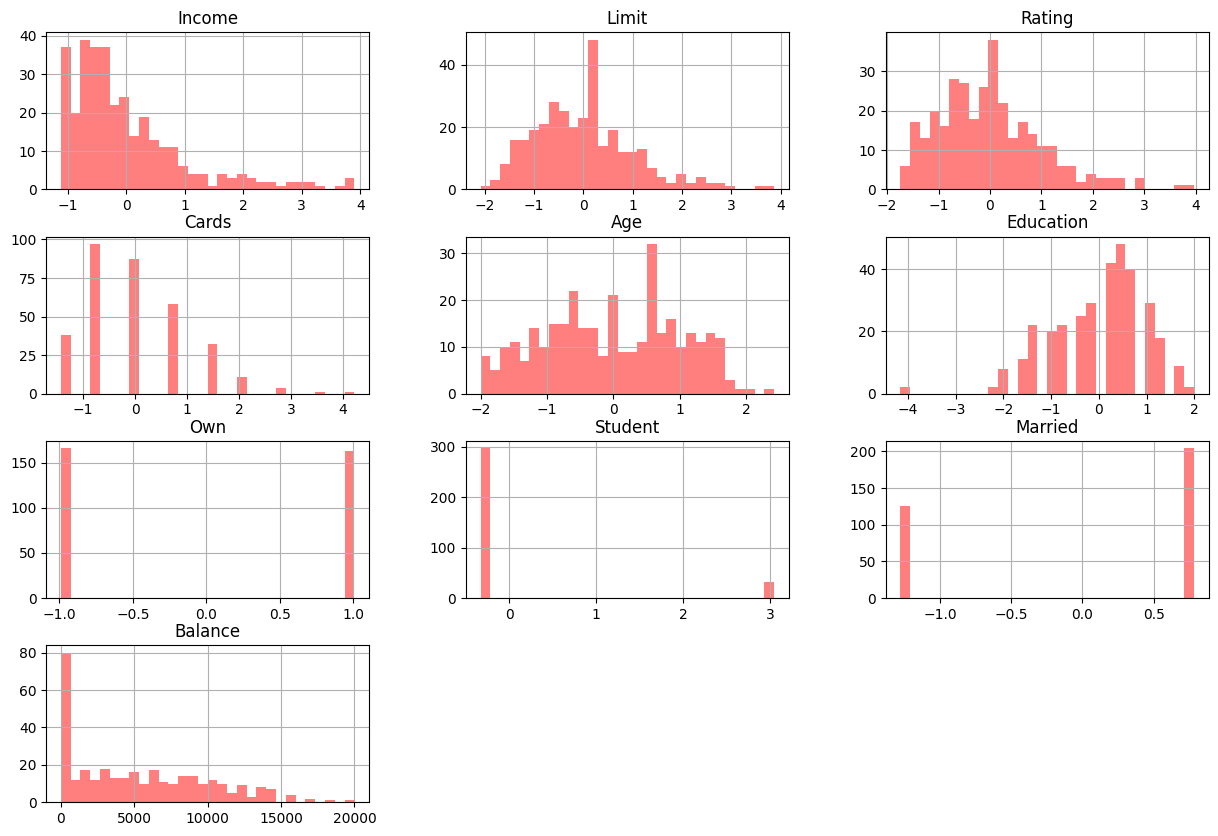

In [14]:
#Se realiza el histograma de las variables disponibles
transformed_train.hist(bins=30, figsize=(15,10), color="red", alpha=0.5) 
plt.show()

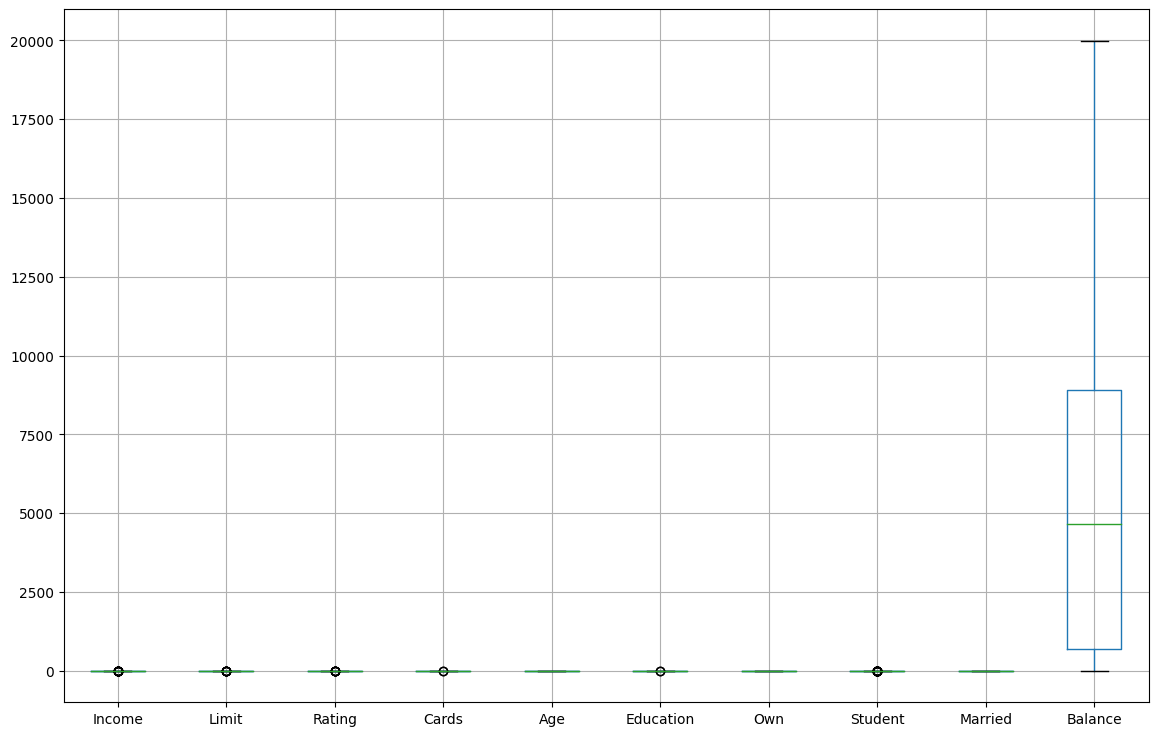

(329, 10)

In [15]:
#Se identifican los valores atipicos y se eliminan con el metodo IQR
transformed_train[['Income','Limit','Rating','Cards','Age','Education','Own','Student','Married','Balance']].boxplot(figsize=(14,9))
plt.show()

Q1 = transformed_train.quantile(0.25)
Q3 = transformed_train.quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

transformed_train.shape

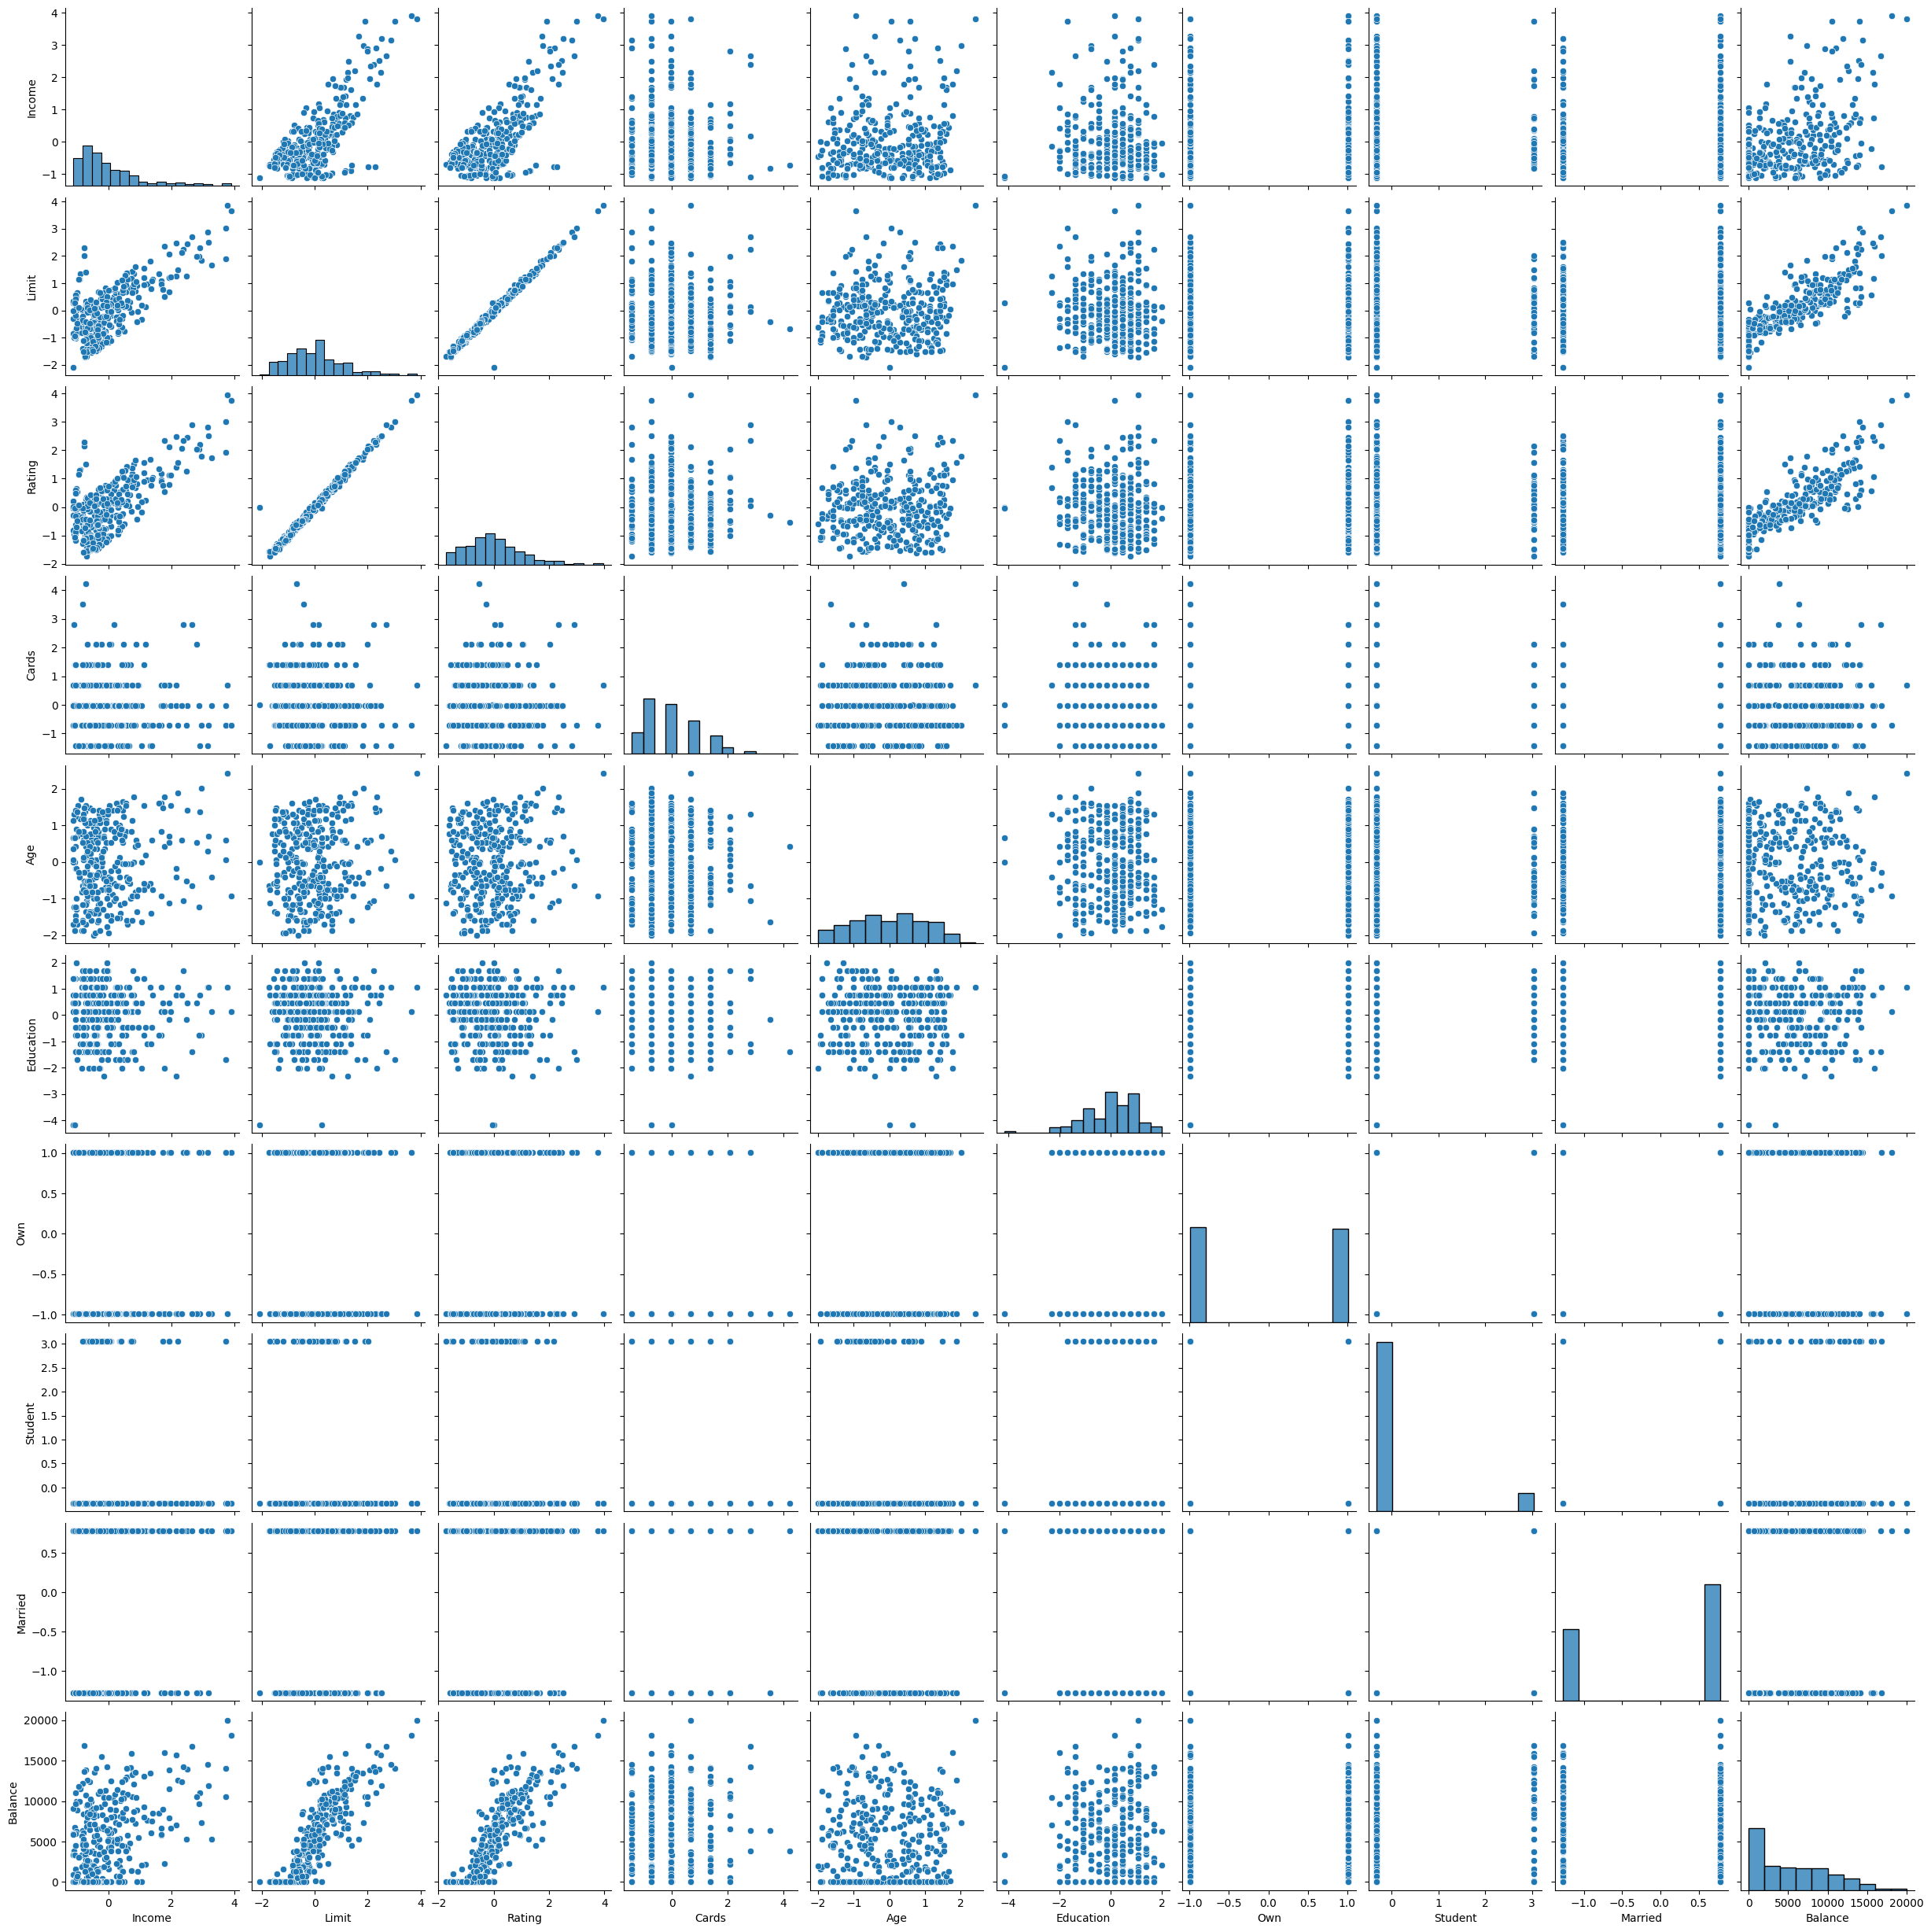

In [16]:
#Se genera la matriz de dispersiòn
from seaborn.distributions import kdeplot
sns.pairplot(transformed_train)

<Axes: >

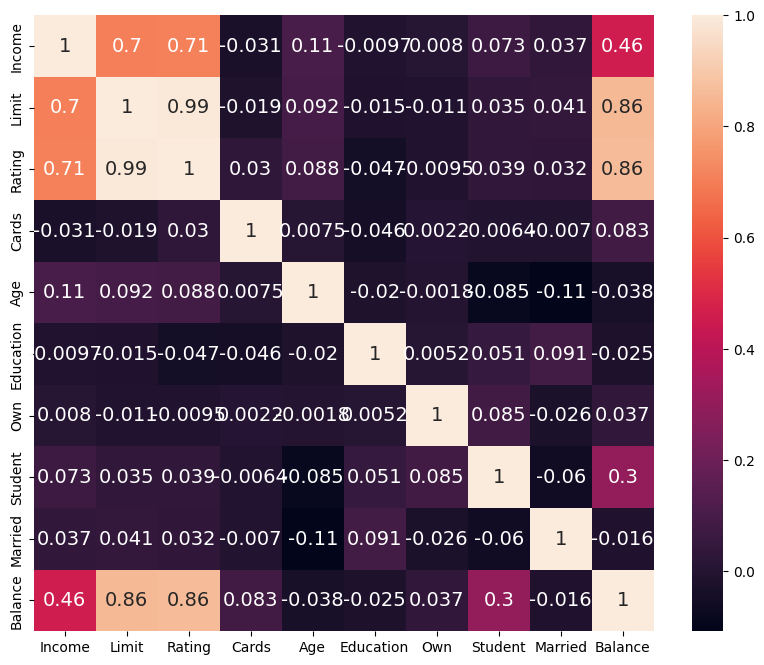

In [17]:
#Se realiza el mapa de calor de la correlaciòn de las variables
plt.figure(figsize=(10,8))
plt.rc({'size':'18'})
sns.heatmap(transformed_train.corr(), annot = True,annot_kws={"size":14})

# C Generar el modelo

In [18]:
#Se construye el modelo con cada una de las variables disponibles, teniendo en cuenta el estimador
from sklearn.linear_model import SGDRegressor

model_result = {}
X_train, y_train = train.drop('Balance', axis='columns'), train['Balance']

In [19]:
for feature in X_train.columns:
  
  regressorSGD = Pipeline(
      steps=[("numerical_imputer", SimpleImputer(strategy='mean')), 
           ("scaler", StandardScaler()), 
           ("sgd", SGDRegressor())])
  
  regressorSGD.fit(X_train[feature].values.reshape(-1,1), y_train)

  model_result[feature] = regressorSGD

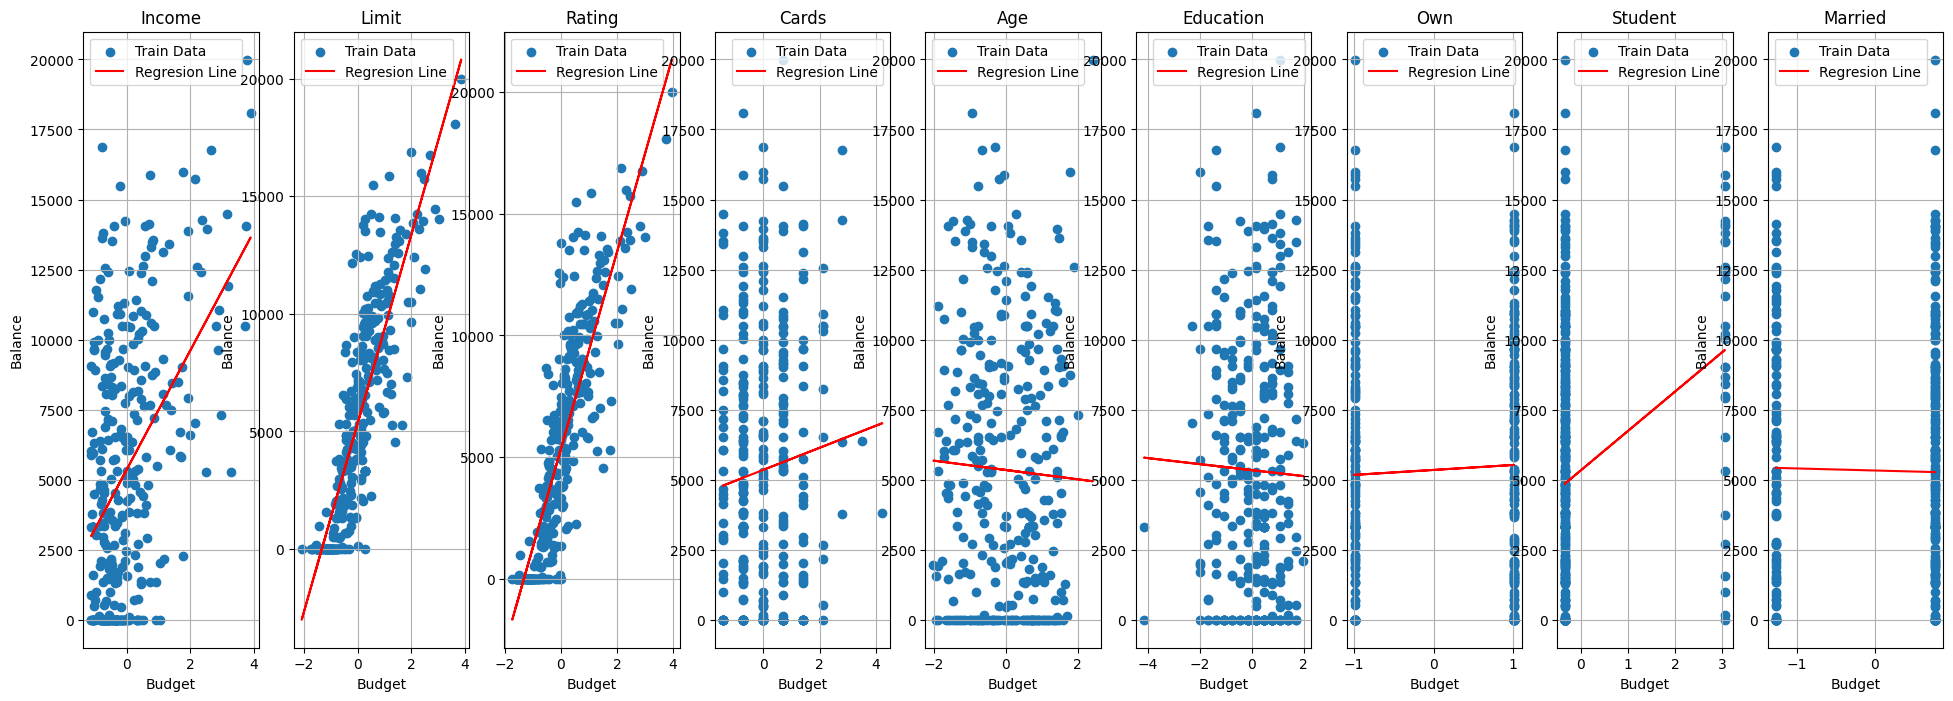

In [20]:
fig, axes = plt.subplots(1, len(X_train.columns), figsize=(24, 8))

for i ,column in enumerate(X_train.columns):
  X_values = X_train[column].values.reshape(-1, 1)
  y_values = y_train.values.reshape(-1, 1)

  axes[i].scatter(transformed_train[column], y_values, label='Train Data')
  model = model_result[column]
  predicted = model.predict(X_values)
  axes[i].plot(transformed_train[column], predicted, color='red', label='Regresion Line')
  axes[i].set_title(column)
  axes[i].set_xlabel('Budget')
  axes[i].set_ylabel('Balance')
  axes[i].grid()
  axes[i].legend()
  

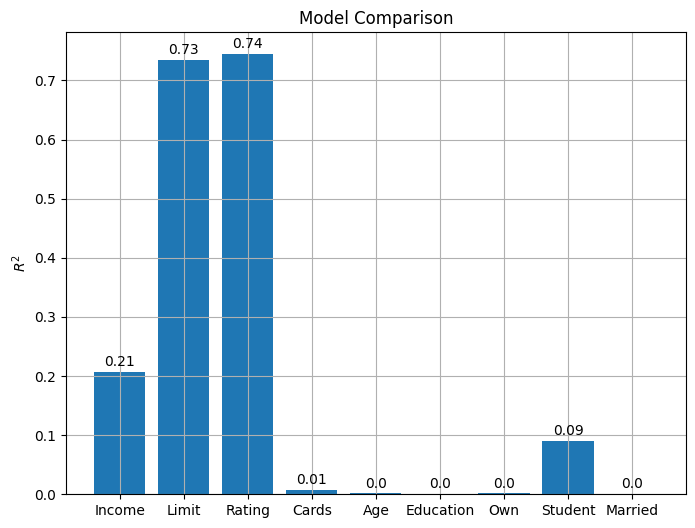

In [21]:
#Seleccione los 5 modelos con el coeficiente de determinación más alto y compárelos con un
#diagrama de barras

scores = []
for i, feature in enumerate(X_train.columns):
  X_values = X_train.iloc[:,i].values.reshape(-1, 1)
  y_values = y_train.values.reshape(-1, 1)
  model = model_result[feature]
  scores.append(model.score(X_values, y_values))

plt.figure(figsize=(8,6))
plt.bar(X_train.columns, scores)
plt.ylabel('$R^2$')
plt.title('Model Comparison')
plt.grid()

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.01, round(y[i],2), ha = 'center')

add_labels(X_train.columns, scores)

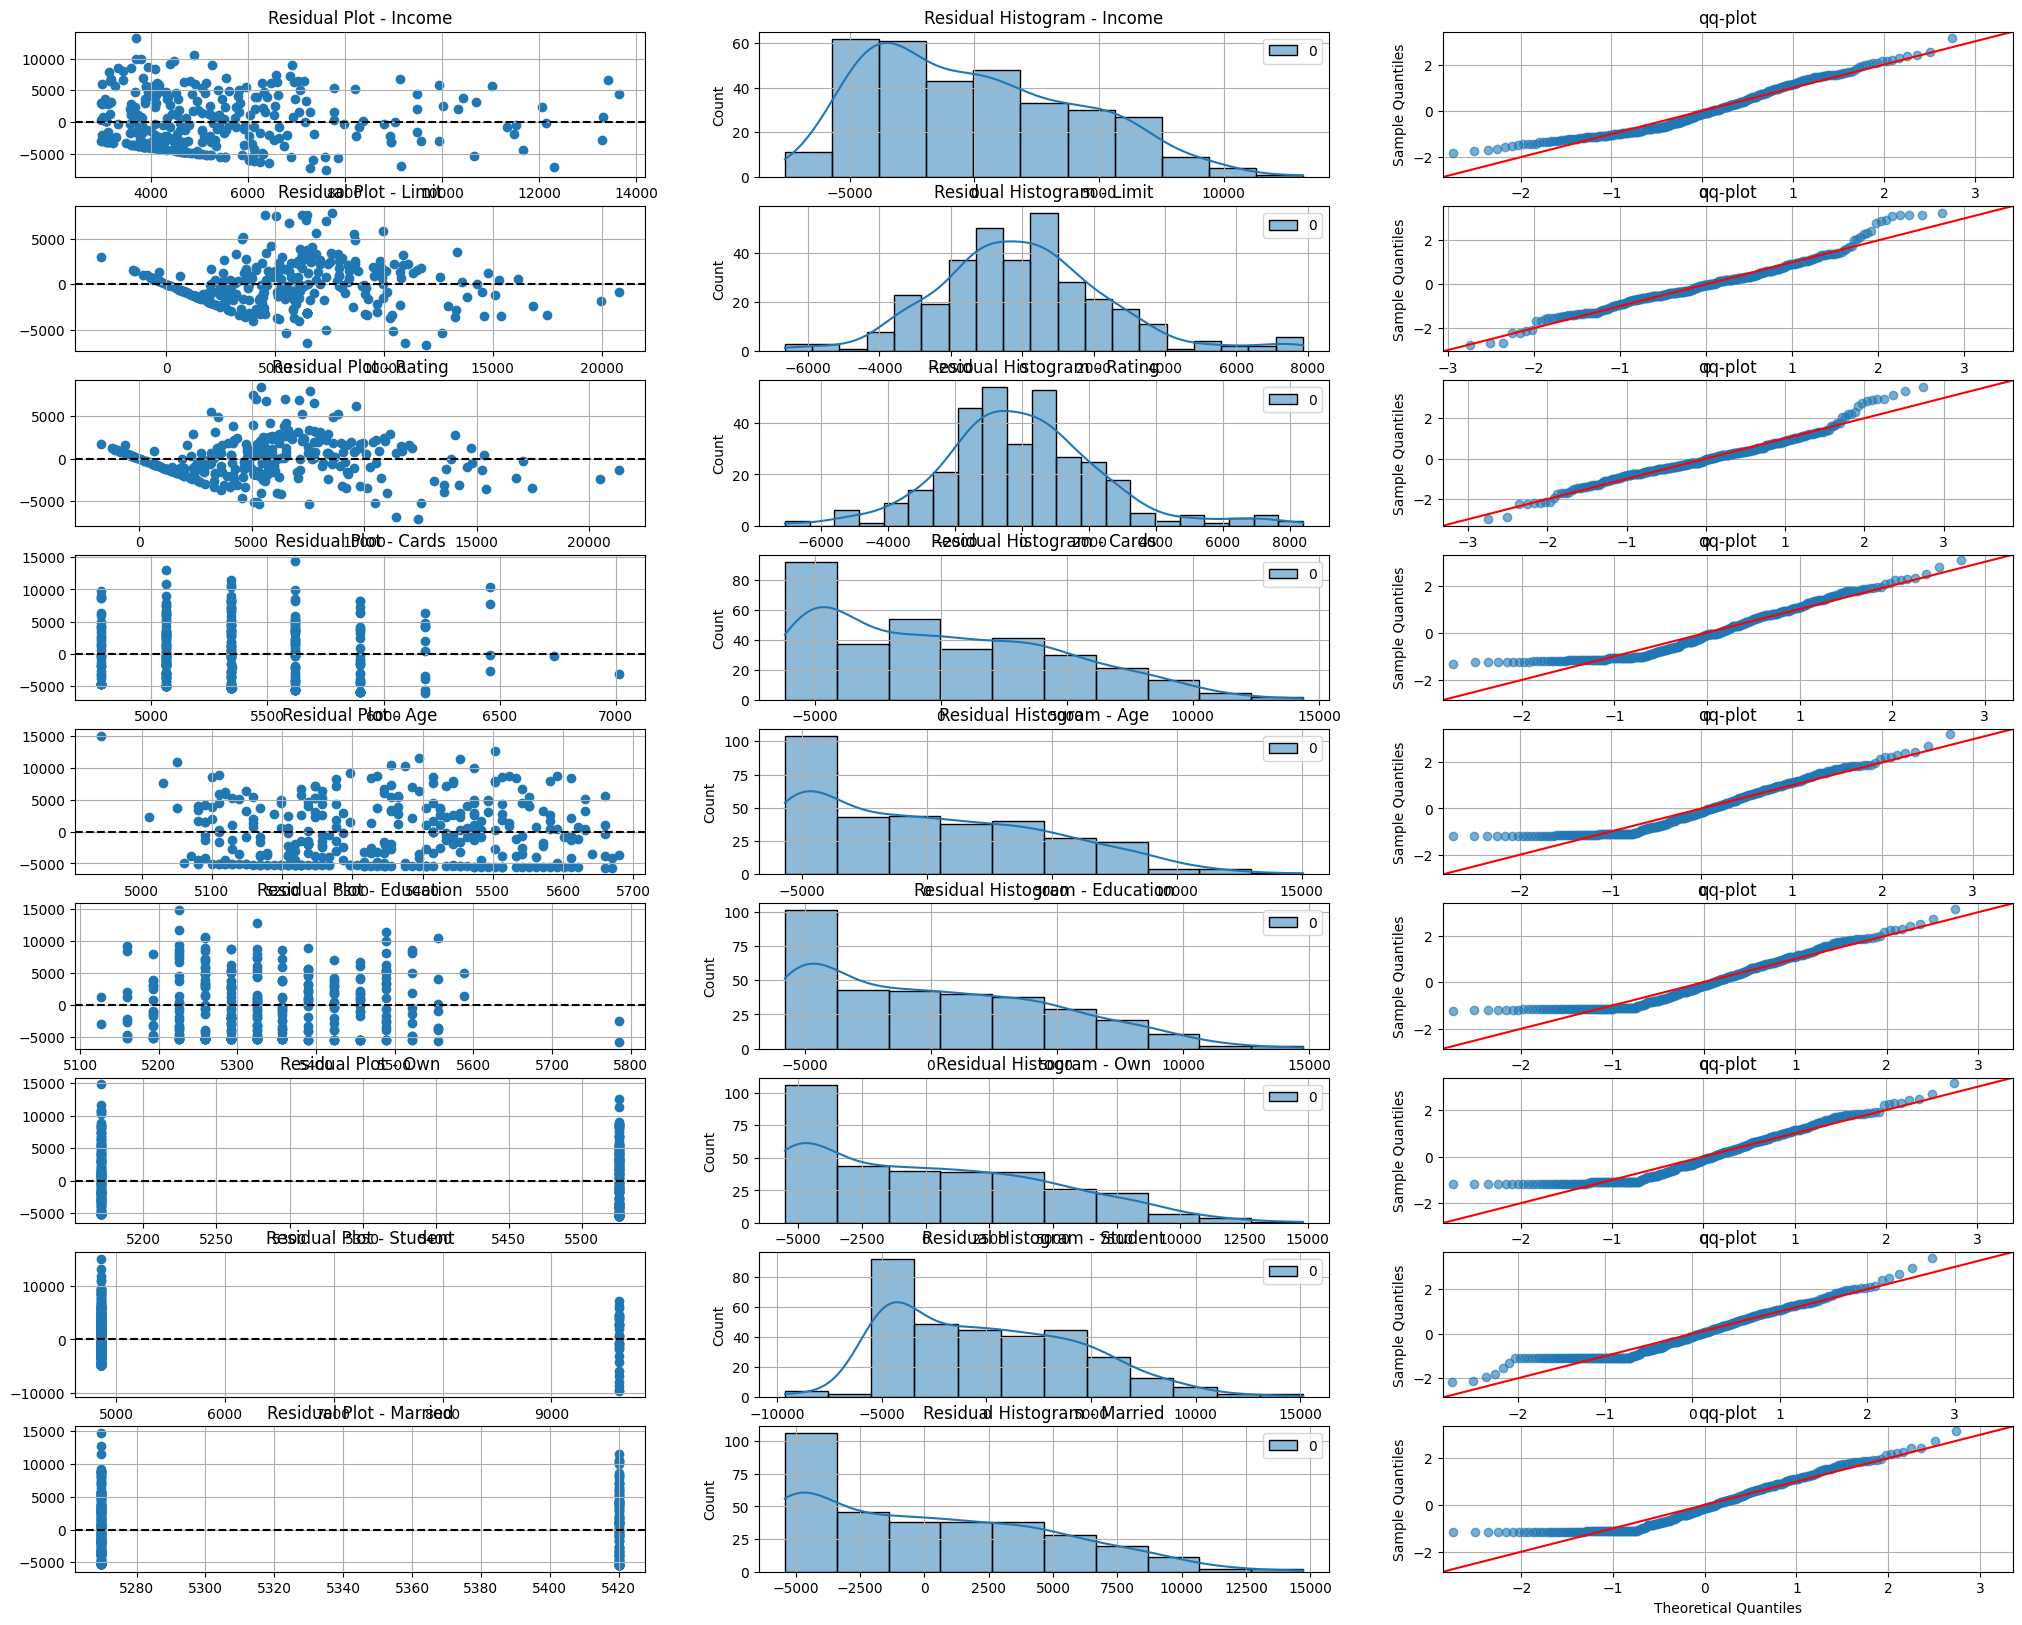

In [40]:
#Se genera las graficas de residuos
from statsmodels.api import qqplot

selected = ['Income','Limit','Rating','Cards','Age','Education','Own','Student','Married']
residuals_train = {}
fig, axes = plt.subplots(9, 3, figsize=(25, 20))

for i, feature in enumerate(selected):

  X_values = X_train[feature].values.reshape(-1,1)
  y_values = y_train.values.reshape(-1, 1)
  model = model_result[feature]
  y_pred = model.predict(X_values)
  residual =  y_values - y_pred.reshape(-1,1) 
  residuals_train[feature] = residual
  axes[i][0].axhline(y=0, color='black', linestyle='--') 
  axes[i][0].scatter(y_pred, residual)
  axes[i][0].set_title('Residual Plot - ' +  feature)
  sns.histplot(residual, kde=True, ax=axes[i][1])
  axes[i][1].set_title('Residual Histogram - ' +  feature)
  qqplot(np.sort(residual.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6)
  axes[i][2].set_title('qq-plot')
  axes[i][0].grid()
  axes[i][1].grid()
  axes[i][2].grid()

# D Evaluación de desempeño

In [50]:
from itertools import combinations

all_combinatios = []
model_final = {}
features = ['Income','Limit','Rating','Cards','Age','Married']
final_scores = []
for i in range(1, 7):
  all_combinatios += list(combinations(features, i))

all_combinatios = [list(combination) for combination in all_combinatios]
all_combinatios

[['Income'],
 ['Limit'],
 ['Rating'],
 ['Cards'],
 ['Age'],
 ['Married'],
 ['Income', 'Limit'],
 ['Income', 'Rating'],
 ['Income', 'Cards'],
 ['Income', 'Age'],
 ['Income', 'Married'],
 ['Limit', 'Rating'],
 ['Limit', 'Cards'],
 ['Limit', 'Age'],
 ['Limit', 'Married'],
 ['Rating', 'Cards'],
 ['Rating', 'Age'],
 ['Rating', 'Married'],
 ['Cards', 'Age'],
 ['Cards', 'Married'],
 ['Age', 'Married'],
 ['Income', 'Limit', 'Rating'],
 ['Income', 'Limit', 'Cards'],
 ['Income', 'Limit', 'Age'],
 ['Income', 'Limit', 'Married'],
 ['Income', 'Rating', 'Cards'],
 ['Income', 'Rating', 'Age'],
 ['Income', 'Rating', 'Married'],
 ['Income', 'Cards', 'Age'],
 ['Income', 'Cards', 'Married'],
 ['Income', 'Age', 'Married'],
 ['Limit', 'Rating', 'Cards'],
 ['Limit', 'Rating', 'Age'],
 ['Limit', 'Rating', 'Married'],
 ['Limit', 'Cards', 'Age'],
 ['Limit', 'Cards', 'Married'],
 ['Limit', 'Age', 'Married'],
 ['Rating', 'Cards', 'Age'],
 ['Rating', 'Cards', 'Married'],
 ['Rating', 'Age', 'Married'],
 ['Cards', 

In [51]:
for combination in all_combinatios:
   sgd = SGDRegressor()
   X_values = X_train[combination].values.reshape(-1, len(combination))
   y_values = y_train.ravel()
   
   regressorSGD = Pipeline(
      steps=[("numerical_imputer", SimpleImputer(strategy='mean')), 
           ("scaler", StandardScaler()), 
           ("sgd", SGDRegressor())])
  
   regressorSGD.fit(X_values, y_values)
   y_pred = regressorSGD.predict(X_values)
   model_final[combination.__repr__()] = regressorSGD
   final_scores.append(regressorSGD.score(X_values, y_values))

In [52]:
test_scores = []

X_test, y_test = test.drop('Balance', axis='columns'), test['Balance']

for combination in all_combinatios:

  X_values = X_test[combination].values.reshape(-1,len(combination))
  y_values = y_test.values.reshape(-1, 1)

  model = model_final[combination.__repr__()]
  test_scores.append(model.score(X_values, y_values))

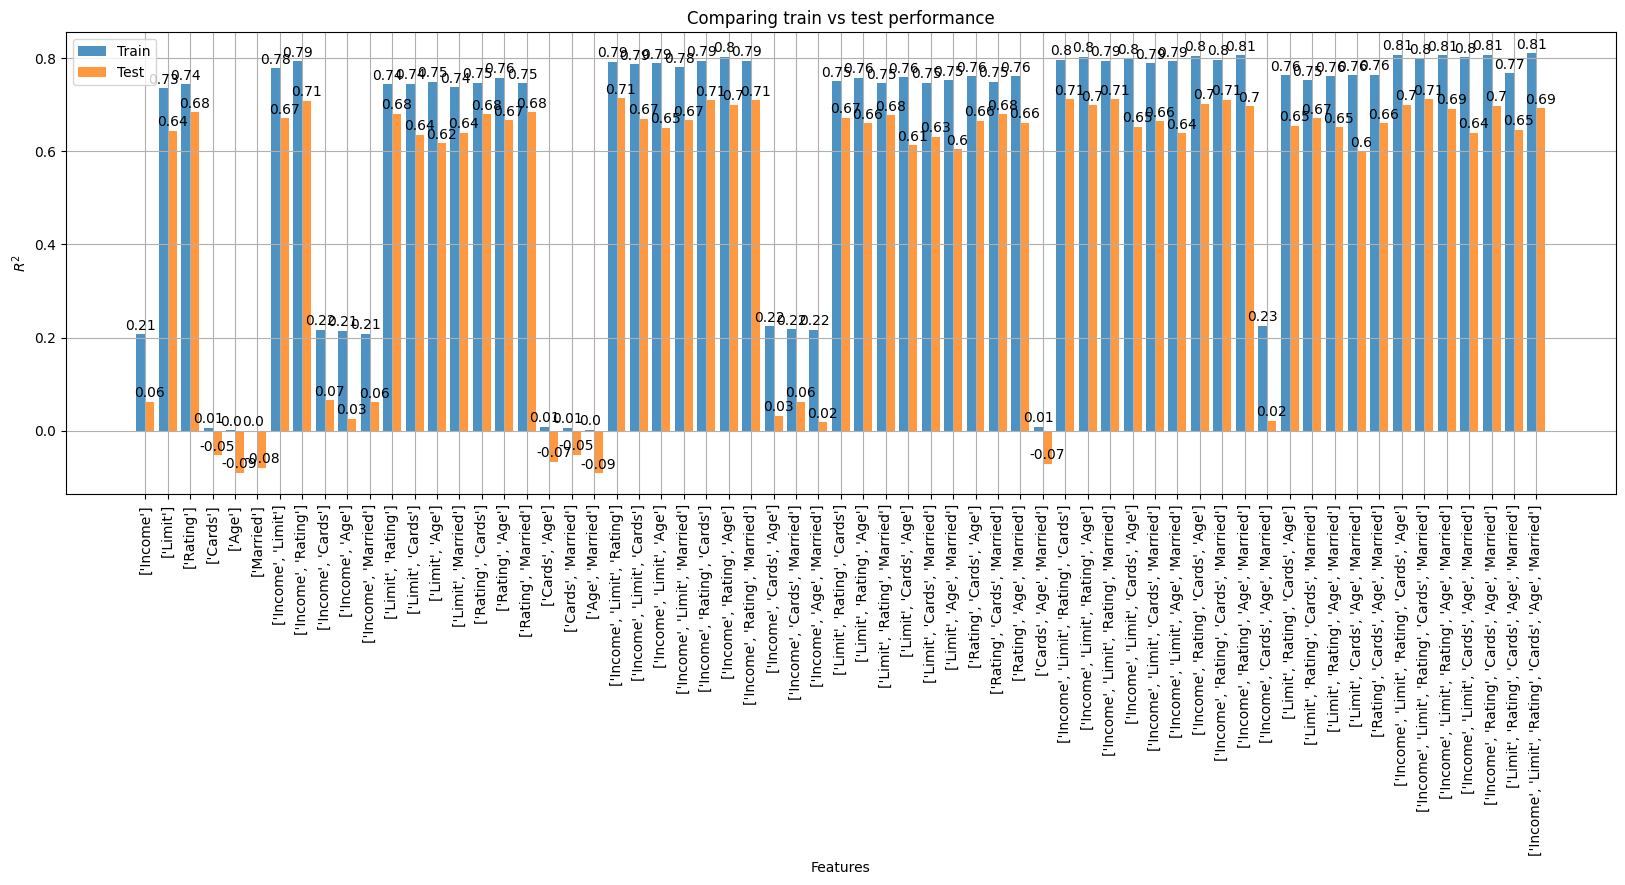

In [53]:
plt.figure(figsize=(20, 6))

X_axis = np.arange(len(model_final.keys()))

plt.bar(X_axis - 0.2, final_scores[:len(X_axis)], 0.4, label='Train', alpha=0.8)
plt.bar(X_axis + 0.2, test_scores[:len(X_axis)], 0.4, label='Test', alpha=0.8)

plt.ylabel('$R^2$')
plt.title('Test Comparison')
plt.grid()
plt.xticks(X_axis, model_final.keys(), rotation=90)
plt.xlabel("Features")
plt.title("Comparing train vs test performance")
plt.legend()

def addlabels(x, y, val):
    for i in range(len(x)):
        plt.text(i + val, y[i] + 0.01, round(y[i], 2), ha='center')

addlabels(model_final.keys(), final_scores[:len(X_axis)], -0.2)
addlabels(model_final.keys(), test_scores[:len(X_axis)], 0.2)

plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword a

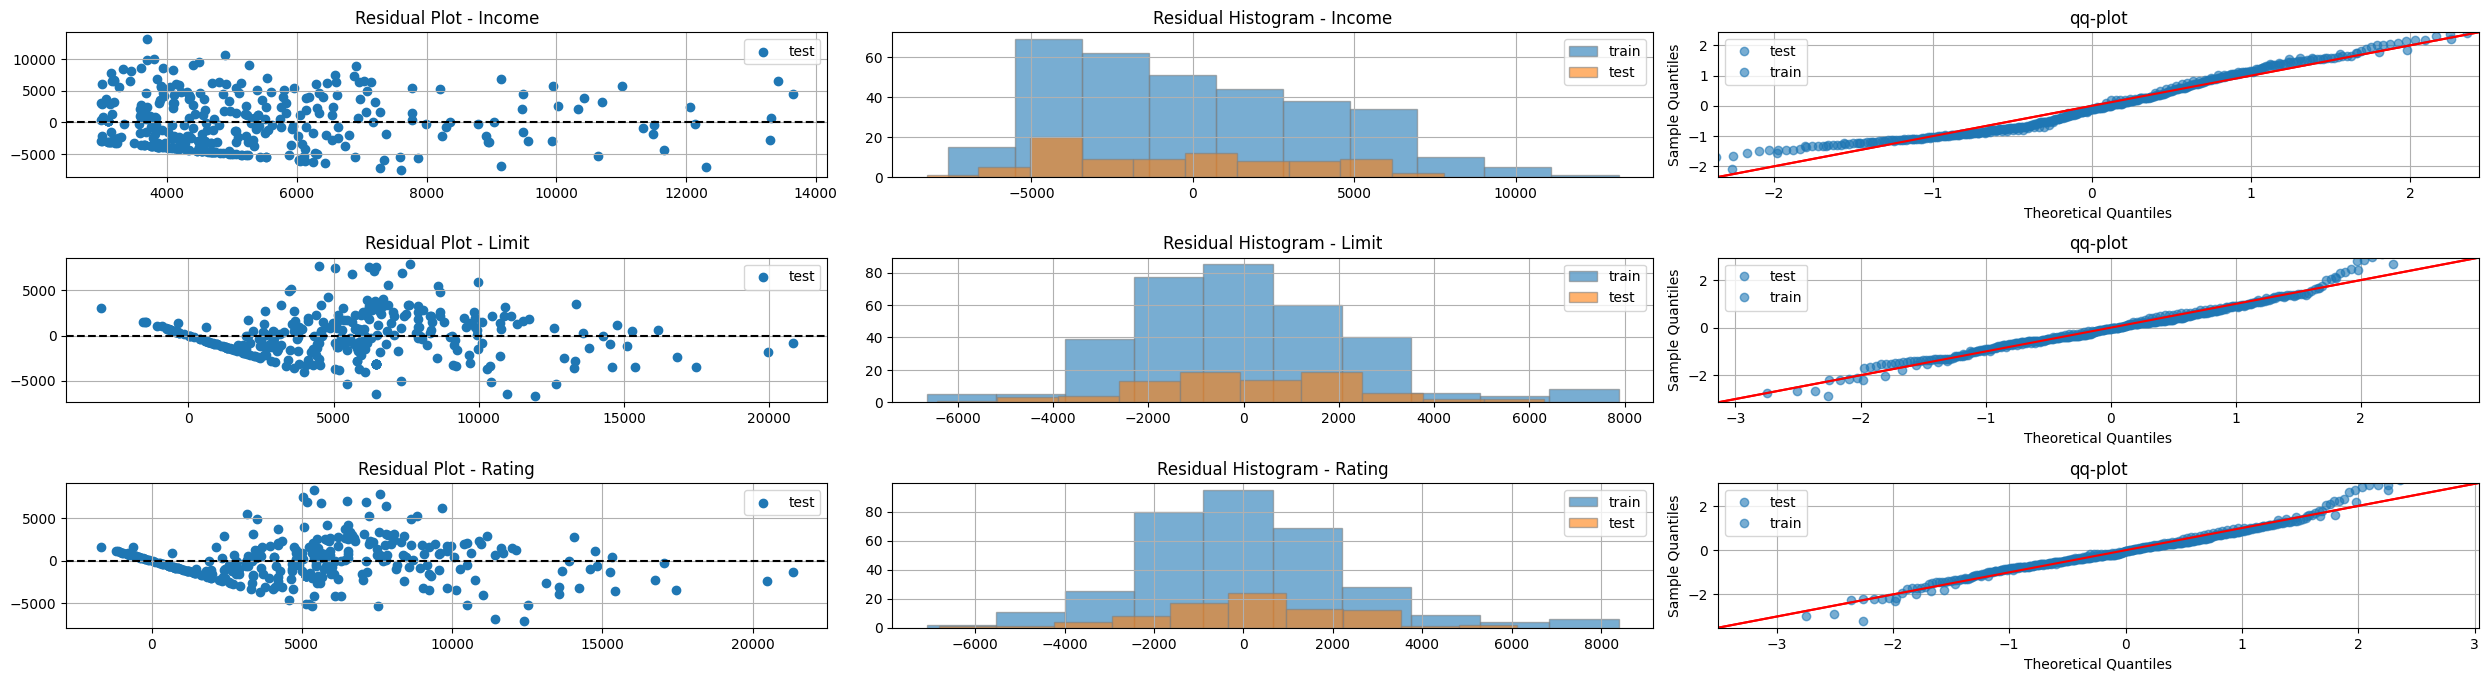

In [54]:
selected = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Own', 'Student', 'Married']
fig, axes = plt.subplots(9, 3, figsize=(25, 20))

# Iterate up to the minimum of the number of selected features and the number of rows in axes
for i, combination in enumerate(selected[:min(len(selected), axes.shape[0])]):

    X_train_values = X_train[combination].values.reshape(-1, 1)
    residual_ = residuals_train[combination]

    X_test_values = X_test[combination].values.reshape(-1, 1)
    y_values = y_test.values.reshape(-1, 1)
    model = model_result[combination]
    y_pred = model.predict(X_test_values)
    y_pred_ = model.predict(X_train_values)
    residual = y_values - y_pred.reshape(-1, 1)

    axes[i][0].axhline(y=0, color='black', linestyle='--')
    axes[i][0].scatter(y_pred_, residual_, label='test')
    axes[i][0].set_title('Residual Plot - ' + combination)
    axes[i][0].legend()
    axes[i][0].grid()

    axes[i][1].hist(residual_, alpha=0.6, ec="grey", label='train')
    axes[i][1].hist(residual, alpha=0.6, ec="grey", label='test')
    axes[i][1].set_title('Residual Histogram - ' + combination)
    axes[i][1].legend()
    axes[i][1].grid()

    qqplot(np.sort(residual.flatten()), fit=True, line="45", ax=axes[i][2], alpha=0.6, label='test')
    axes[i][2].set_title('qq-plot')
    qqplot(np.sort(residual_.flatten()), fit=True, line="45", ax=axes[i][2], alpha=0.6, color='orange', label='train')
    axes[i][2].set_title('qq-plot')
    axes[i][2].grid()
    axes[i][2].legend()

# Remove any remaining empty subplots
for j in range(len(selected), axes.shape[0] * axes.shape[1]):
    axes.flatten()[j].remove()

plt.tight_layout()
plt.show()


In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

train_score = regressorSGD.score(X_values, y_values)
print("Coefficient of determination in the training set: ", train_score)
print('MAE:', mean_absolute_error(y_values, y_pred))
print('MSE:', mean_squared_error(y_values, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_values, y_pred)))


Coefficient of determination in the training set:  0.6920805662547771
MAE: 3439.02080965102
MSE: 16107093.457046624
RMSE: 4013.364356378153
